In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

%matplotlib inline

In [2]:
data = {'status': ['won','lost','lost','lost'],
        'eau': [100000,220000,500000,1100000],
       'margin': [0.35,0.28,0.24,0.18],}
df=pd.DataFrame.from_dict(data)
df

,status,eau,margin
0,won,100000,0.35
1,lost,220000,0.28
2,lost,500000,0.24
3,lost,1100000,0.18


In [3]:
Xbin = np.arange(0, 2250000, 250000)
cols = ['< 250k','250k < eau < 500k','500k < eau < 750k','750k < eau < 1M',
          '1M < eau < 1.25M','1.25M < eau < 1.5M','1.5M < eau < 1.75M','1.75M < eau < 2M']

Ybin = np.arange(0, 1.25, 0.25).tolist()

rows   = ['0.75 < gm < 1','0.50 < gm < 0.75','0.25 < gm < 0.50','gm < 0.25']
rows_d = rows
rows_d.reverse()
    
    
df['eau_bin']    = pd.cut(df['eau'],   bins=Xbin, labels=cols)    #  columns
df['margin_bin'] = pd.cut(df['margin'],bins=Ybin, labels=rows_d)  # rows
df

,status,eau,margin,eau_bin,margin_bin
0,won,100000,0.35,< 250k,0.25 < gm < 0.50
1,lost,220000,0.28,< 250k,0.25 < gm < 0.50
2,lost,500000,0.24,250k < eau < 500k,gm < 0.25
3,lost,1100000,0.18,1M < eau < 1.25M,gm < 0.25


In [4]:
shape    = (len(rows),len(cols)) 
oppy_map = np.zeros(shape)
win_map  = np.zeros(shape)
loss_map = np.zeros(shape)

heat_maps = {'opportunities': oppy_map, 'wins': win_map, 'losses': loss_map}

i = 0
for row in rows:
    j = 0
    for col in cols:
        oppy_map[i,j]  =  ((df['eau_bin'] == col)    & (df['margin_bin'] == row)).sum()
        win_map[i,j]   =  ((df['status']  == 'won')  & (df['eau_bin'] == col) & (df['margin_bin'] == row)).sum()
        loss_map[i,j]  =  -((df['status'] == 'lost') & (df['eau_bin'] == col) & (df['margin_bin'] == row)).sum()
        j+=1
        
    i +=1


### PLOT

opportunities [[0. 1. 0. 0. 1. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


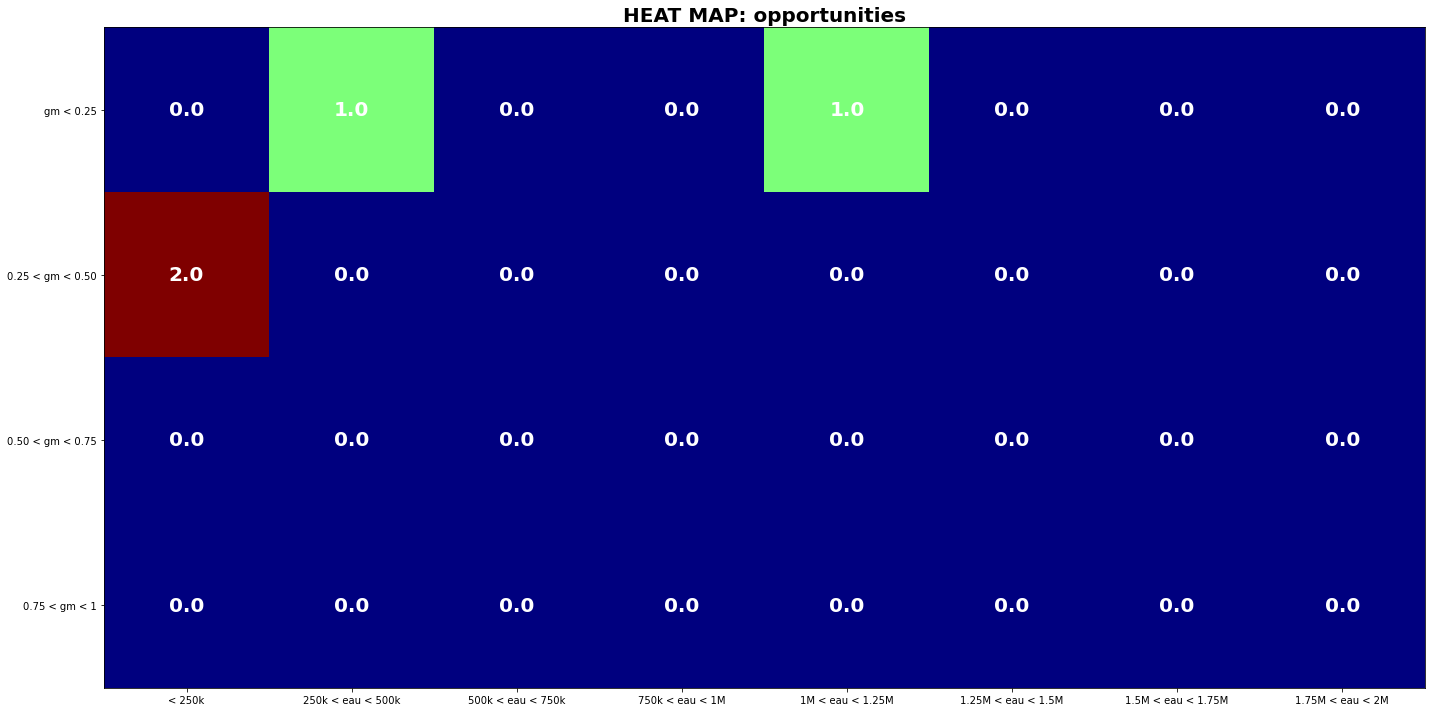

wins [[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


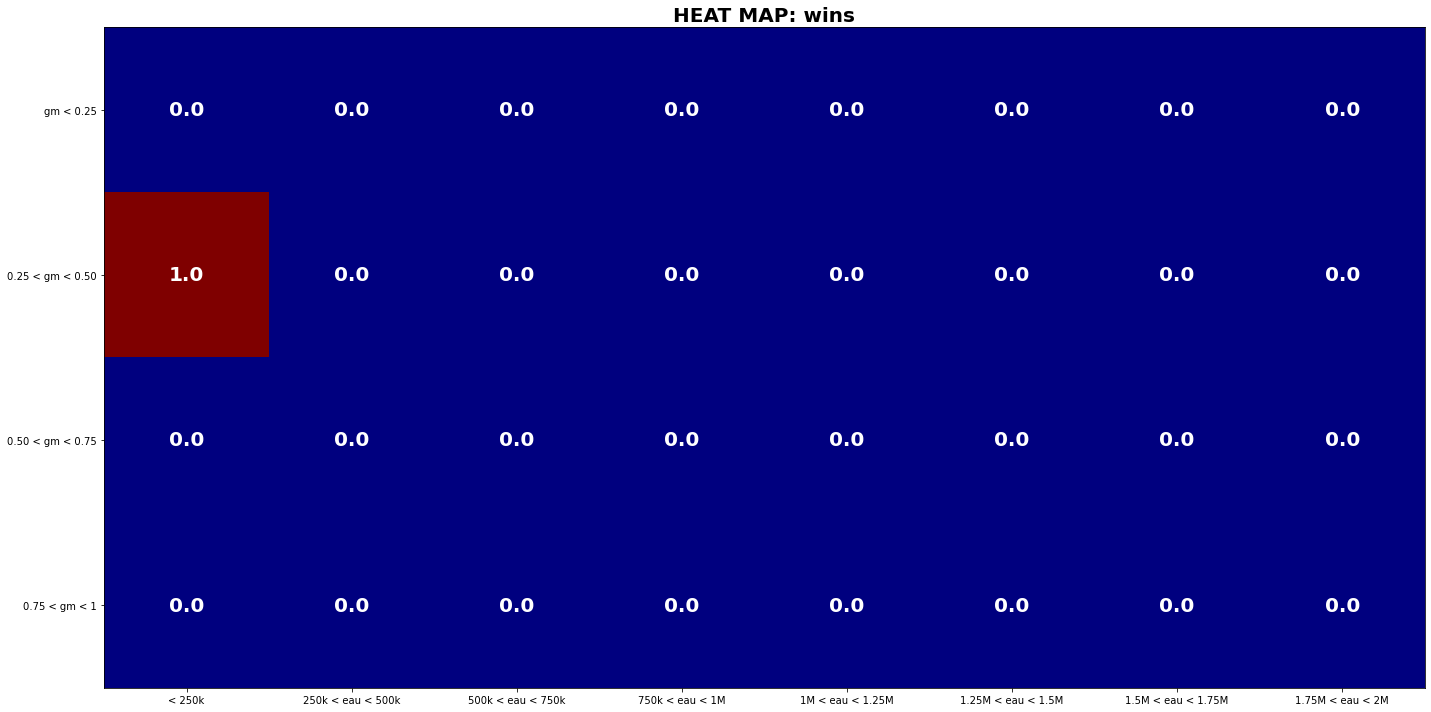

losses [[ 0. -1.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


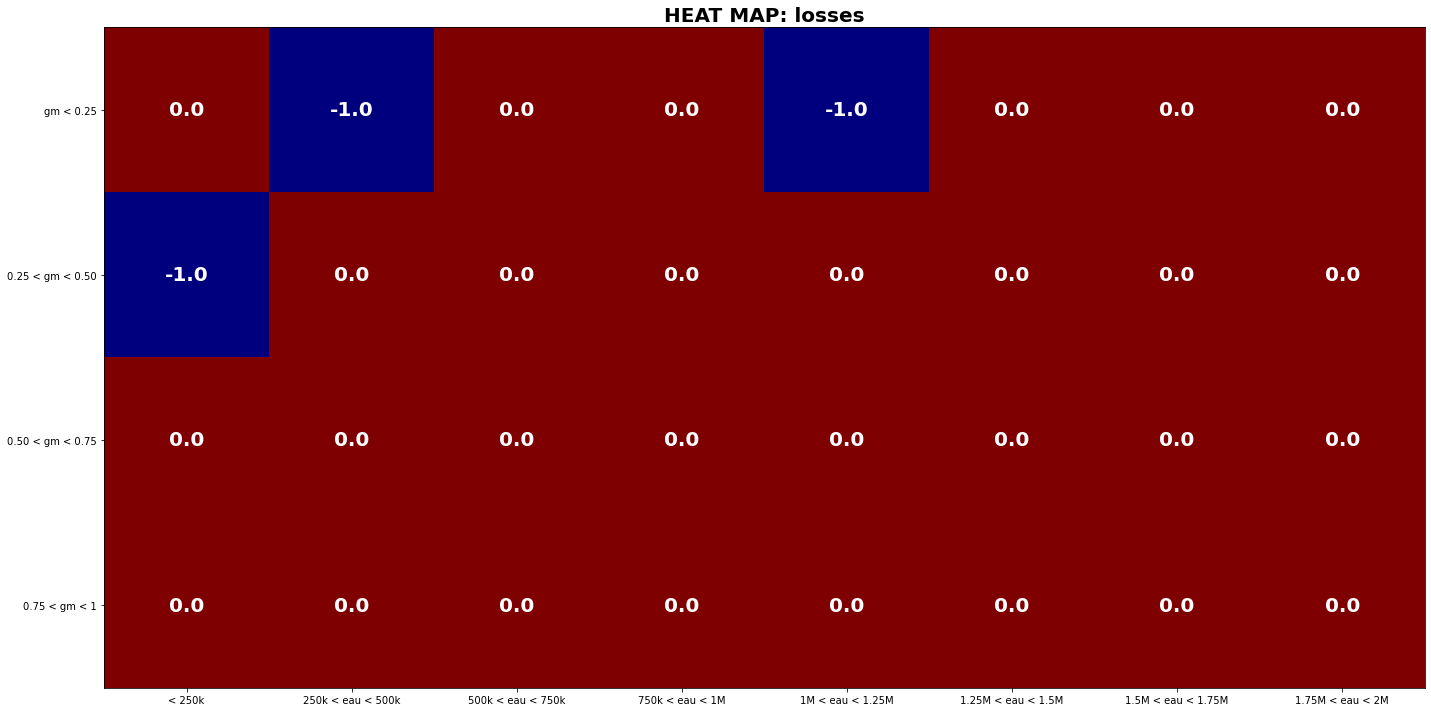

In [5]:


for k,v in heat_maps.items():
    print(k,v)
    fig, ax = plt.subplots(figsize=(20, 10))
    im      = ax.imshow(v,cmap='jet')
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    ax.set_xticklabels(cols)
    ax.set_xticks(np.arange(len(cols)))
    ax.set_yticklabels(rows)
    ax.set_yticks(np.arange(len(rows)))    
    
    for i in range(len(rows)):
        for j in range(len(cols)):
            text = ax.text(j, i, v[i, j], ha="center", va="center", color="w",fontsize= 20, fontweight ='bold')
            title = 'HEAT MAP: ' + k
            ax.set_title(title,fontsize= 20, fontweight ='bold',)
            fig.tight_layout()
    plt.show()